## Audiobooks data EDA

### Libraries to import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
print('Set up completed.')

Set up completed.


### Loading the data

In [21]:
audiobooks_data = pd.read_csv('../Audiobook/data/Audiobooks-data-with-col-names.csv',index_col=0)
audiobooks_data.head()

,Book_length_mins_avg,Book_length_mins_overall,Price_avg,Price_overall,Review,Rating,Completion,Minutes_listened,Support_requests,Last_visited_minus_purchase_date,Targets
ID,,,,,,,,,,,
994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


In [22]:
#finding null values if any
audiobooks_data.isnull().sum()

Book_length_mins_avg                0
Book_length_mins_overall            0
Price_avg                           0
Price_overall                       0
Review                              0
Rating                              0
Completion                          0
Minutes_listened                    0
Support_requests                    0
Last_visited_minus_purchase_date    0
Targets                             0
dtype: int64

In [23]:
#sort the values according to the index
audiobooks_data =  audiobooks_data.sort_values('ID')
audiobooks_data.head()

,Book_length_mins_avg,Book_length_mins_overall,Price_avg,Price_overall,Review,Rating,Completion,Minutes_listened,Support_requests,Last_visited_minus_purchase_date,Targets
ID,,,,,,,,,,,
2,1188.0,1188,7.68,7.68,0,8.91,0.0,0.0,0,0,0
3,648.0,648,5.33,5.33,1,9.00,0.0,0.0,0,0,0
6,2160.0,2160,8.61,8.61,0,8.91,0.0,0.0,0,0,0
10,324.0,324,5.87,5.87,0,8.91,0.0,0.0,0,0,0
11,1188.0,1188,5.95,5.95,0,8.91,0.0,0.0,0,0,0


In [24]:
audiobooks_data.describe()

,Book_length_mins_avg,Book_length_mins_overall,Price_avg,Price_overall,Review,Rating,Completion,Minutes_listened,Support_requests,Last_visited_minus_purchase_date,Targets
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,1591.281685,1678.608634,7.103791,7.543805,0.160750,8.909795,0.125659,189.888983,0.070222,61.935033,0.158833
std,504.340663,654.838599,4.931673,5.560129,0.367313,0.643406,0.241206,371.084010,0.472157,88.207634,0.365533
min,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,194.400000,0.000000,105.000000,0.000000
max,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2160.000000,30.000000,464.000000,1.000000


In [27]:
# total purchases made 
total_amt = audiobooks_data['Price_overall'].sum()
print('Total puchases made from the app (in dollars): ',total_amt)

Total puchases made from the app (in dollars):  106246.95


In [72]:
# number of books purchased
audiobooks_data['num_of_books_bought'] = audiobooks_data['Book_length_mins_overall']//audiobooks_data['Book_length_mins_avg']
print('Total books purchased from the app: ',audiobooks_data['num_of_books_bought'].sum())

Total books purchased from the app:  14977.0


Qty and number of customers <bound method IndexOpsMixin.tolist of num_of_books_bought
1.0    13440
2.0      463
3.0      127
4.0       46
5.0        2
6.0        6
dtype: int64>


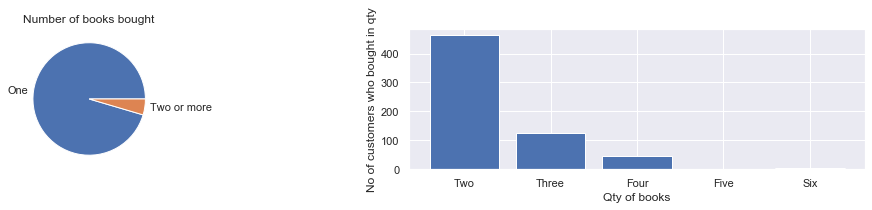

In [134]:
# number of books puchased
qty_books_pie =[]
data = audiobooks_data[audiobooks_data['num_of_books_bought']==1]
qty_books_pie.append(data['num_of_books_bought'].count())
data = audiobooks_data[audiobooks_data['num_of_books_bought']>=2]
qty_books_pie.append(data['num_of_books_bought'].count())


qty = pd.Series(qty_books_pie,index=['One','Two or more'])
qty_bar = data.groupby('num_of_books_bought').size()


print("Qty and number of customers",audiobooks_data.groupby('num_of_books_bought').size().tolist)



#No of books purchased - Pie Chart and bar chart
fig=plt.figure(figsize=(18,15))
ax=fig.add_subplot(5,2,5)
qty.plot.pie(label='',title='Number of books bought',ax=ax)

ax=fig.add_subplot(5,2,6)
plt.bar(['Two','Three','Four','Five','Six'],qty_bar.tolist())
plt.xlabel('Qty of books')
plt.ylabel('No of customers who bought in qty')
plt.show(block=True)

In [152]:
# Total number of Support Requests ( everything from forgotten password to assistance for using the App)
total_no_of_support_requests_made =  audiobooks_data['Support_requests'].sum()
print("Total number of Support Requests made:",total_no_of_support_requests_made)

#Highest support requests made by the Customer 
highest_number_of_requests = audiobooks_data['Support_requests'].max()
customer_max_requests = audiobooks_data[audiobooks_data['Support_requests']==highest_number_of_requests]
print("Highest number of Support Requests made by a Customer: ",highest_number_of_requests," by customer ID:",customer_max_requests.index.values)

Total number of Support Requests made: 989
Highest number of Support Requests made by a Customer:  30  by customer ID: [22427]


Total number of customers who gave rating:  2468
Total number of customers who didnt rating:  11616


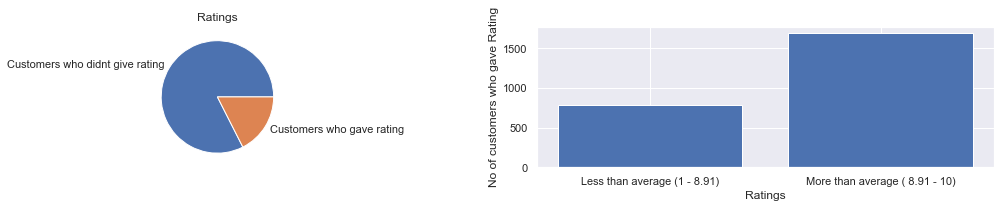

In [214]:
#rating

lessthanavg = audiobooks_data[audiobooks_data['Rating']<8.91].count().values[0]
morethanavg = audiobooks_data[audiobooks_data['Rating']>8.91].count().values[0]
rate_count = [lessthanavg, morethanavg]
ratings = pd.Series([(audiobooks_data['Rating'].size-totalnumofratingreceived),totalnumofratingreceived],index=['Customers who didnt give rating','Customers who gave rating'])

#number of customers who gave rating
totalnumofratingreceived = lessthanavg+morethanavg
print('Total number of customers who gave rating: ', totalnumofratingreceived)
print('Total number of customers who didnt rating: ', (audiobooks_data['Rating'].size-totalnumofratingreceived))

#No of ratings received - Pie Chart and bar chart
fig=plt.figure(figsize=(18,15))
ax=fig.add_subplot(5,2,5)
ratings.plot.pie(label='',title='Ratings',ax=ax)

ax=fig.add_subplot(5,2,6)
plt.bar(['Less than average (1 - 8.91)', 'More than average ( 8.91 - 10)'],rate_count)
plt.xlabel('Ratings')
plt.ylabel('No of customers who gave Rating')
plt.show(block=True)

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


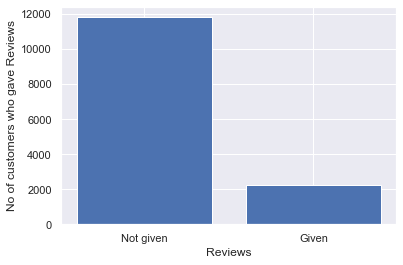

In [224]:
# Reviews
reviews_count= []
reviews_count.append(audiobooks_data[audiobooks_data['Review']==0].count().values[0])
reviews_count.append(audiobooks_data[audiobooks_data['Review']>0].count().values[0])


ax=fig.add_subplot(5,2,6)
plt.bar(['Not given','Given'],reviews_count)
plt.xlabel('Reviews')
plt.ylabel('No of customers who gave Reviews')
plt.show(block=True)

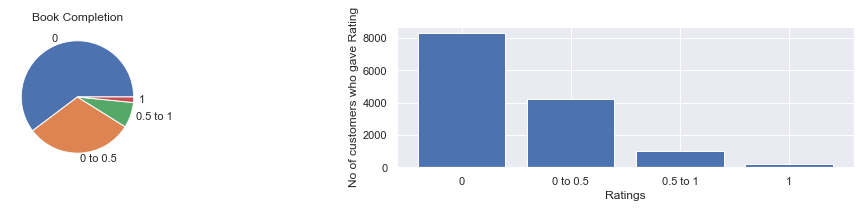

In [255]:
# Audiobook completion
#not_started = 0, started_tohalfway  = 0 to 0.5, halfway_to_almostdone = 0.5 to 0.99, finished = 1
#temp = audiobooks_data.sort_values(['Completion'])
#print(temp['Completion'].unique())
not_started = audiobooks_data[audiobooks_data['Completion']==0].count().values[0]
started_to_halfway = audiobooks_data[audiobooks_data['Completion'].between(0.01,0.5,inclusive = False)].count().values[0]
halfway_to_almostdone = audiobooks_data[audiobooks_data['Completion'].between(0.51,1,inclusive = False)].count().values[0]
finished = audiobooks_data[audiobooks_data['Completion']==1].count().values[0]

labels = ['0','0 to 0.5','0.5 to 1', '1']

completion_count = [ not_started, started_to_halfway, halfway_to_almostdone, finished]
completion_pie = pd.Series(completion_count,index=labels)
#No of ratings received - Pie Chart and bar chart
fig=plt.figure(figsize=(18,15))
ax=fig.add_subplot(5,2,5)
completion_pie.plot.pie(label='',title='Book Completion',ax=ax)

ax=fig.add_subplot(5,2,6)
plt.bar(labels,completion_count)
plt.xlabel('Ratings')
plt.ylabel('No of customers who gave Rating')
plt.show(block=True)


In [306]:
#minutes listened
total_mins_listened = audiobooks_data['Minutes_listened'].sum()
print('Total number of minutes listened:', total_mins_listened)
print('Total number of minutes listened (in hours):',total_mins_listened//60)

Total number of minutes listened: 2674396.44
Total number of minutes listened (in hours): 44573.0


In [269]:
audiobooks_data.columns

Index(['Book_length_mins_avg', 'Book_length_mins_overall', 'Price_avg',
       'Price_overall', 'Review', 'Rating', 'Completion', 'Minutes_listened',
       'Support_requests', 'Last_visited_minus_purchase_date', 'Targets',
       'num_of_books_bought'],
      dtype='object')

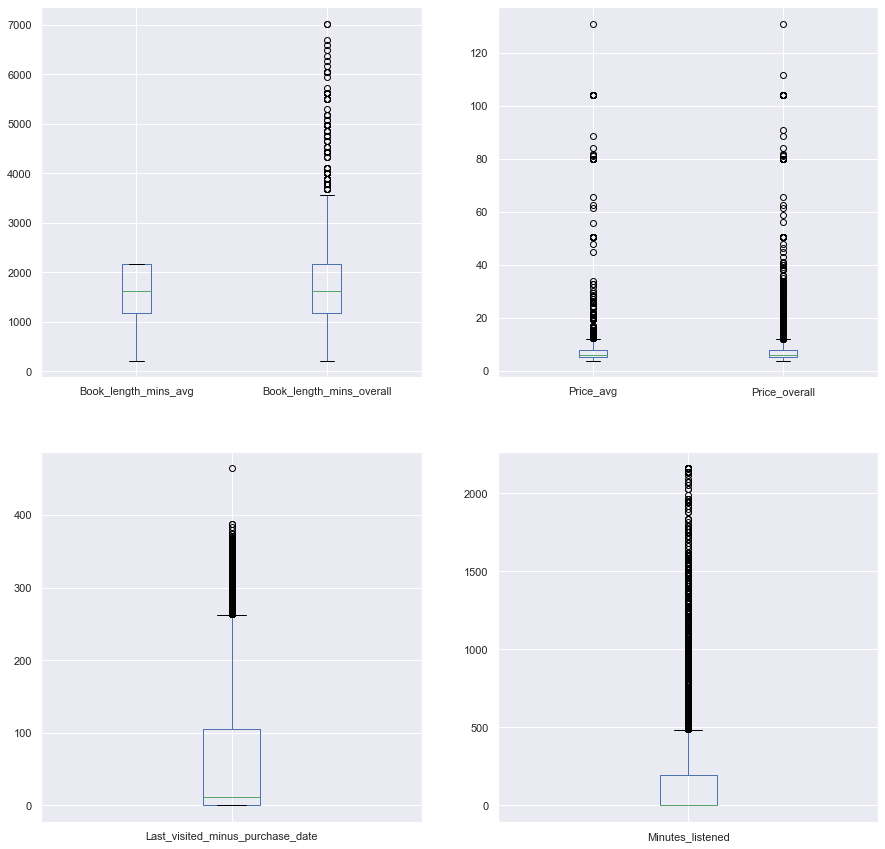

In [303]:
#box plot 
list_df = [audiobooks_data[['Book_length_mins_avg','Book_length_mins_overall']], audiobooks_data[['Price_avg','Price_overall']], 
          audiobooks_data[['Last_visited_minus_purchase_date']], audiobooks_data[['Minutes_listened']]]
fig, axes = plt.subplots(2,2, figsize=(15,15))
for i,df in zip(range(4),list_df):
    df.boxplot(ax=axes.flatten()[i])

#boxplotdata4.boxplot(return_type='axes');

#plt.show()

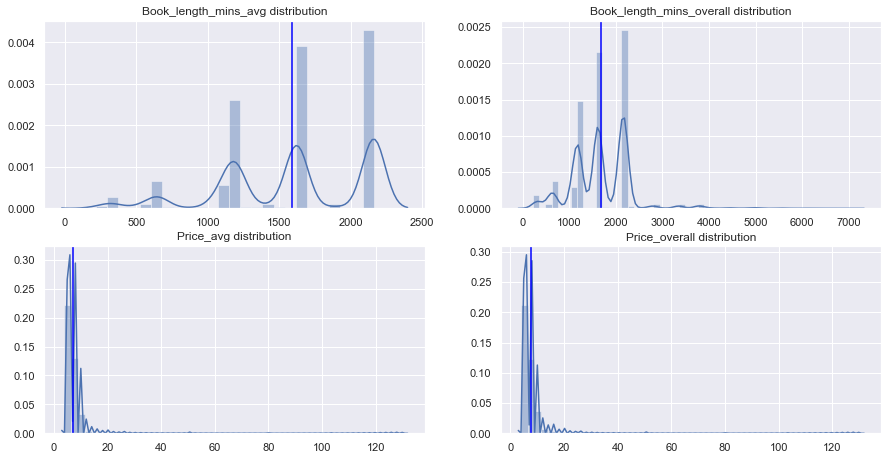

In [301]:
# histograms

numericaldata =  audiobooks_data[['Book_length_mins_avg','Book_length_mins_overall','Price_avg','Price_overall']]  #selects numerical data from the data set - columns from Beats per minute to Speechiness

fig=plt.figure(figsize=(15,20))
for i,j in zip(numericaldata.columns,range(20)):
    ax=fig.add_subplot(5,2,j+1)
    sns.distplot(numericaldata[i],ax=ax,axlabel=False)
    plt.axvline(numericaldata[i].mean(),label='mean',color='blue')
    plt.title(i + " distribution")
plt.show()
